# Slade Brooks
# M13801712
# Final Exam

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../HW6/")
import PLLT_LiftDistribution as PLLT

# Problem 1

## Part A

The PLLT fundamental equation is:
$$
\alpha(y_o) = \frac{\Gamma(y_o)}{\pi V_{\infty} c(y_o)} + \alpha(y_o)_{L=0} + \frac{1}{4\pi V_{\infty}}\int_{-b/2}^{b/2}{\frac{\frac{d\Gamma}{dy}dy}{y_o-y}}
$$

## Part B

To analyze a wing with taper tatio != 1, we must change the chord at every point. We would need to determine the chord $c$ as a function of spanwise location ($y_o$). This can be found based on the root and tip chord, and solved for across the planform. When solving PLLT, the term $c(y_o)$ would be the chord at each spanwise location. This would allow for a wing of different taper ratio to be analyzed with PLLT.

$$
\alpha(y_o) = \frac{\Gamma(y_o)}{\pi V_{\infty} \fbox{$c(y_o)$}} + \alpha(y_o)_{L=0} + \frac{1}{4\pi V_{\infty}}\int_{-b/2}^{b/2}{\frac{\frac{d\Gamma}{dy}dy}{y_o-y}}
$$

## Part C

To analyze a wing with geometric twist, we would need to know the angle of attack of each cross section at each spanwise location ($y_o$). Geometric twist refers to changing the angle of each cross section along the wing. Assuming only geometric twist, the airfoil stays the same and the zero lift angle of attack is constant. However, the airfoil's actual angle of attack is not only related to the PLLT fundamental equation since it is mounted differently. Therefore, the $\alpha(y_o)$ term will need to be adjusted (or replaced - depending on if you are solving for $\alpha$ or $\Gamma$) to account for the twist

$$
\fbox{$\alpha(y_o)$} = \frac{\Gamma(y_o)}{\pi V_{\infty} c(y_o)} + \alpha(y_o)_{L=0} + \frac{1}{4\pi V_{\infty}}\int_{-b/2}^{b/2}{\frac{\frac{d\Gamma}{dy}dy}{y_o-y}}
$$

## Part D

To analyze a wing with aerodynamic twist, we need to know the zero lift angle of attack ($\alpha_{L=0}$) of each airfoil. Since aerodynamic twist refers to changing the airfoil across the wing, that term will change with respect to spanwise location ($y_o$). Therefore, similar to a tapered wing, we must determine a function for the zero lift angle of attack with respect to spanwise location. This can be done using TAFT on each airfoil section on the wing. Then, $\alpha_{L=0}$ will be the zero lift angle of attack of the airfoil section at that location when doing PLLT.

$$
\alpha(y_o) = \frac{\Gamma(y_o)}{\pi V_{\infty} c(y_o)} + \fbox{$\alpha(y_o)_{L=0}$} + \frac{1}{4\pi V_{\infty}}\int_{-b/2}^{b/2}{\frac{\frac{d\Gamma}{dy}dy}{y_o-y}}
$$

# Problem 2

## Part A

Deploying a flap decreases $\alpha_{L=0}$. This is because a flap essentially is adding camber to the airfoil.

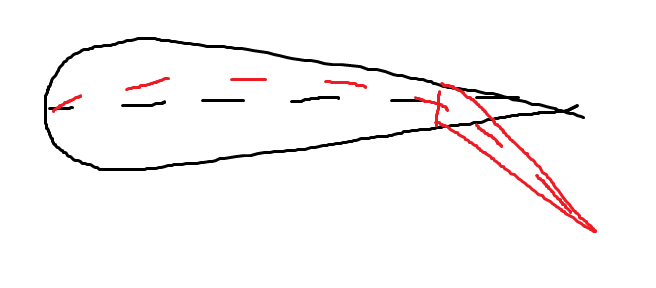

My beautiful ms paint drawing shows that deploying a flap on an airfoil would change its camber line to be higher camber. This is easiest to see on a symmetrical airfoil, as it goes from having no camber to having camber.

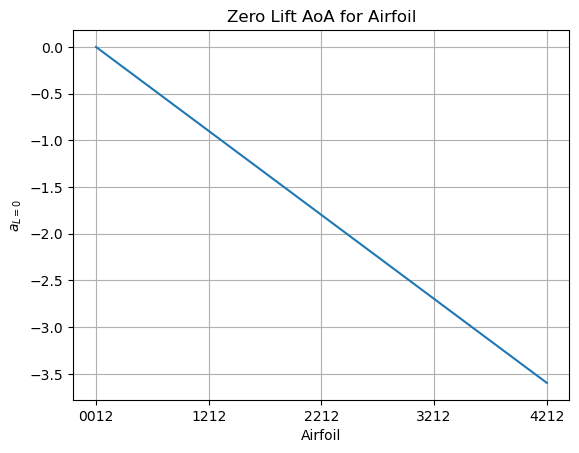

In [7]:
airfoils = ["0012", "1212", "2212", "3212", "4212"]
aoa = [np.degrees(PLLT.TAFT(a)[0]) for a in airfoils]
plt.plot(airfoils, aoa)
plt.xlabel("Airfoil")
plt.ylabel("$a_{L=0}$")
plt.title("Zero Lift AoA for Airfoil")
plt.grid()
plt.show()

Here we see that as the airfoil camber increases (the first number) and thickness and camber location are kept constant, the zero lift angle of attack decreases. This comes from TAFT results of the airfoil (and what we know about increasing camber).

## Part B

Deploying a flap should increase Cl and Cd. On the last exam we examined the effects of camber on Cl, Cd, and Cm. We can see from those results that since deploying a flap is like increasing camber, both Cl and Cd will increase.

| Airfoil | CL       | CD       | CM        |
|---------|----------|----------|-----------|
| 2412    | 0.401513 | 0.019082 | -0.143194 |
| 4412    | 0.5656   | 0.02265  | -0.263941 |
| 6412    | 0.8813   | 0.0217   | -0.3695   |
| 8412    | 1.025    | 0.03017  | -0.4377   |

This data comes from the airfoils at 2 degrees aoa @ Re=100k (from Matt, Jordan, Marek, and me).

These effects are supported by the data above, which shows a trend upwards in CL, CD, and CM as the camber increases.

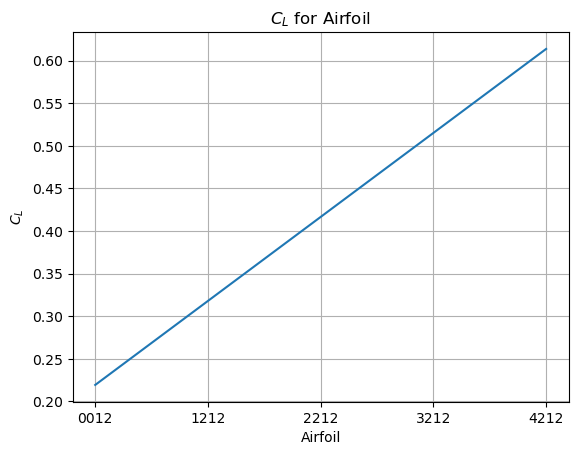

In [11]:
cl = [PLLT.TAFT(a)[1](np.radians(2)) for a in airfoils]
plt.plot(airfoils, cl)
plt.xlabel("Airfoil")
plt.ylabel("$C_L$")
plt.title("$C_L$ for Airfoil")
plt.grid()
plt.show()

We can see once again from TAFT that the Cl increases as camber increases.

# Problem 3

## Part A

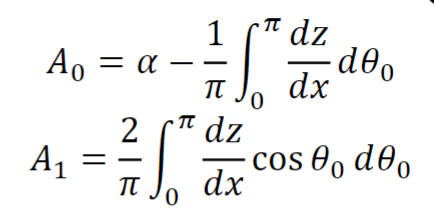

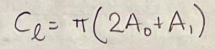

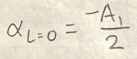

These equations come from our notes and example for a cambered airfoil TAFT.

## Part B

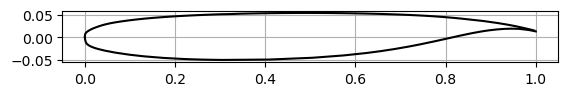

In [21]:
# read in airfoil file
data = np.loadtxt("k2foil.txt")
# split into x and y for upper and lower surface
xup = data[0:117, 0]
yup = data[0:117, 1]
xlo = data[118:, 0]
ylo = data[118:, 1]
plt.plot(xup, yup, "k")
plt.plot(xlo, ylo, "k")
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

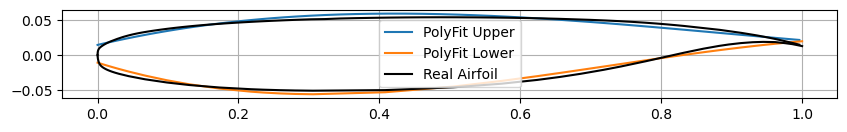

In [33]:
# polyfit to surfaces - using numpy because ez
au, bu, cu, du = np.polyfit(xup, yup, 3)
al, bl, cl, dl = np.polyfit(xlo, ylo, 3)
plt.figure(figsize=(10, 10))
plt.plot(xup, au*xup**3+bu*xup**2+cu*xup+du, label="PolyFit Upper")
plt.plot(xlo, al*xlo**3+bl*xlo**2+cl*xlo+dl, label="PolyFit Lower")
plt.plot(xup, yup, "k", label="Real Airfoil")
plt.plot(xlo, ylo, "k")
plt.gca().set_aspect("equal")
plt.grid()
plt.legend()
plt.show()